Ici on fait de l'ACP sur les données

In [51]:
library("dplyr")
library("FactoMineR")

In [52]:
# CHARGER les données
data_20_stations <- read.csv("../data/mesures/donnees_extracted_20.csv")

In [53]:
head(data_20_stations)

,ID.OMM.station,Date,Pression.au.niveau.mer,Variation.de.pression.en.3.heures,Type.de.tendance.barométrique,Direction.du.vent.moyen.10.mn,Vitesse.du.vent.moyen.10.mn,Température,Point.de.rosée,Humidité,⋯,Altitude,communes..name.,communes..code.,EPCI..name.,EPCI..code.,department..name.,department..code.,region..name.,region..code.,mois_de_l_annee
,<int>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<int>,<chr>,<int>,<chr>,<dbl>,<chr>,<int>,<chr>,<dbl>,<int>
1,7181,2016-07-12T11:00:00+02:00,101410,-30,8,230,2.9,293.35,286.55,65,⋯,336,Thuilley-aux-Groseilles,54523,CC du Pays de Colombey et du Sud Toulois,245400510,Meurthe-et-Moselle,54,Grand Est,44,7
2,7020,2017-01-12T13:00:00+01:00,100580,-710,8,210,11.9,282.05,280.15,88,⋯,6,La Hague,50041,CA du Cotentin,200067205,Manche,50,Normandie,28,1
3,7280,2017-12-23T13:00:00+01:00,103830,-10,0,10,2.7,280.75,278.35,85,⋯,219,Ouges,21473,Dijon Métropole,242100410,Côte-d'Or,21,Bourgogne-Franche-Comté,27,12
4,7015,2017-01-15T13:00:00+01:00,102280,-50,8,270,3.3,276.15,274.65,90,⋯,47,Fretin,59256,Métropole Européenne de Lille,245900410,Nord,59,Hauts-de-France,32,1
5,7110,2017-01-17T19:00:00+01:00,103530,70,3,80,2.1,275.35,272.05,79,⋯,94,Guipavas,29075,Brest Métropole,242900314,Finistère,29,Bretagne,53,1
6,7222,2018-01-01T07:00:00+01:00,101060,-410,8,220,7.3,283.85,281.65,86,⋯,26,Saint-Aignan-Grandlieu,44150,Nantes Métropole,244400404,Loire-Atlantique,44,Pays de la Loire,52,1


In [54]:
cat(colnames(data_20_stations))

ID.OMM.station Date Pression.au.niveau.mer Variation.de.pression.en.3.heures Type.de.tendance.barométrique Direction.du.vent.moyen.10.mn Vitesse.du.vent.moyen.10.mn Température Point.de.rosée Humidité Visibilité.horizontale Temps.présent Temps.passé.1 Temps.passé.2 Nebulosité.totale Nébulosité..des.nuages.de.l..étage.inférieur Hauteur.de.la.base.des.nuages.de.l.étage.inférieur Type.des.nuages.de.l.étage.inférieur Type.des.nuages.de.l.étage.moyen Type.des.nuages.de.l.étage.supérieur Pression.station Niveau.barométrique Géopotentiel Variation.de.pression.en.24.heures Température.minimale.sur.12.heures Température.minimale.sur.24.heures Température.maximale.sur.12.heures Température.maximale.sur.24.heures Température.minimale.du.sol.sur.12.heures Méthode.de.mesure.Température.du.thermomètre.mouillé Température.du.thermomètre.mouillé Rafale.sur.les.10.dernières.minutes Rafales.sur.une.période Periode.de.mesure.de.la.rafale Etat.du.sol Hauteur.totale.de.la.couche.de.neige..glace..autre.au.s

## Nettoyage du Df pour l'ACP

In [55]:
clean_for_acp <- function(df, 
                          id_cols = c(
                            "ID.OMM.station", 
                            "communes..code.", 
                            "EPCI..code.", 
                            "department..code.", 
                            "region..code."),
                          cat_cols = c(
                            "Type.de.tendance.barométrique", 
                            "Temps.présent", 
                            "Temps.passé.1", 
                            "Temps.passé.2", 
                            "Type.des.nuages.de.l.étage.inférieur", 
                            "Type.des.nuages.de.l.étage.moyen", 
                            "Type.des.nuages.de.l.étage.supérieur", 
                            "Type.nuage.1", 
                            "Type.nuage.2", 
                            "Type.nuage.3", 
                            "Type.nuage.4", 
                            "mois_de_l_annee", 
                            "Nebulosité.totale", 
                            "Nébulosité..des.nuages.de.l..étage.inférieur", 
                            "Nébulosité.couche.nuageuse.1", 
                            "Nébulosité.couche.nuageuse.2", 
                            "Nébulosité.couche.nuageuse.3", 
                            "Nébulosité.couche.nuageuse.4",
                            "Etat.du.sol",
                            "Periode.de.mesure.de.la.neige.fraiche"
                            ),
                          other_cols = c()) {
  cat("Columns before cleaning:", colnames(df), "\n")
  cat("Data Frame Size:", dim(df), "\n")
  
  # Select only numeric columns
  df_numeric <- df %>% select_if(is.numeric)
  cat("Removed NaN columns:", setdiff(colnames(df), colnames(df_numeric)), "\n")
  df <- df %>% select_if(is.numeric)
  cat("Columns after numeric selection:", colnames(df), "\n")
  cat("Data Frame Size:", dim(df), "\n")
  
  # Remove ID columns
  df_noId <- df[, !names(df) %in% id_cols]
  cat("Removed id colums:", setdiff(colnames(df), colnames(df_numeric)), "\n")
  df <- df_noId
  cat("Columns after removing ID columns:", colnames(df), "\n")
  cat("Data Frame Size:", dim(df), "\n")
  
  # Remove categorical columns
  df_quantitative <- df[, !names(df) %in% cat_cols]
  cat("Removed qualitative columns:", setdiff(colnames(df), colnames(df_quantitative)), "\n")
  df <- df_quantitative
  cat("Columns after removing categorical columns:", colnames(df), "\n")
  cat("Data Frame Size:", dim(df), "\n")

  # Remove other colums
  if (length(other_cols) > 0){
    df_nOther <- df[, !names(df) %in% other_cols]
    cat("Removed other columns:", setdiff(colnames(df), colnames(df_nOther)), "\n")
    df <- df_nOther
    cat("Columns after removing other colums:", colnames(df), "\n")
    cat("Data Frame Size:", dim(df), "\n") 
  }
  else {
     cat("No other columns to remove \n")
  }
  
  # Remove rows with NA
  cat("Cleaning NaN rows\n")
  df <- na.omit(df)
  cat("Data Frame Size after NA removal:", dim(df), "\n")

  # Remove constant columns
  # const_columns <- sapply(df, function(x) length(unique(x)) == 1)
  # df_noConst <- df[, !const_columns]
  # cat("Removed constant columns:", setdiff(colnames(df), colnames(df_noConst)), "\n")
  # df <- df_noConst
  # cat("Columns after removing constant columns:", colnames(df), "\n")
  # cat("Data Frame Size:", dim(df), "\n")

  cat("Remaining columns:", colnames(df), "\n")
  
  return(df)
}

# Usage:
data_for_acp <- clean_for_acp(data_20_stations, other_cols = c("Rafales.sur.une.période"))



Columns before cleaning: ID.OMM.station Date Pression.au.niveau.mer Variation.de.pression.en.3.heures Type.de.tendance.barométrique Direction.du.vent.moyen.10.mn Vitesse.du.vent.moyen.10.mn Température Point.de.rosée Humidité Visibilité.horizontale Temps.présent Temps.passé.1 Temps.passé.2 Nebulosité.totale Nébulosité..des.nuages.de.l..étage.inférieur Hauteur.de.la.base.des.nuages.de.l.étage.inférieur Type.des.nuages.de.l.étage.inférieur Type.des.nuages.de.l.étage.moyen Type.des.nuages.de.l.étage.supérieur Pression.station Niveau.barométrique Géopotentiel Variation.de.pression.en.24.heures Température.minimale.sur.12.heures Température.minimale.sur.24.heures Température.maximale.sur.12.heures Température.maximale.sur.24.heures Température.minimale.du.sol.sur.12.heures Méthode.de.mesure.Température.du.thermomètre.mouillé Température.du.thermomètre.mouillé Rafale.sur.les.10.dernières.minutes Rafales.sur.une.période Periode.de.mesure.de.la.rafale Etat.du.sol Hauteur.totale.de.la.couche.de

In [56]:
# Eventuellement regarder ici les valeurs des colonnes
head(data_for_acp)


,Pression.au.niveau.mer,Variation.de.pression.en.3.heures,Direction.du.vent.moyen.10.mn,Vitesse.du.vent.moyen.10.mn,Température,Point.de.rosée,Humidité,Visibilité.horizontale,Hauteur.de.la.base.des.nuages.de.l.étage.inférieur,Pression.station,⋯,Hauteur.de.base.2,Hauteur.de.base.3,Hauteur.de.base.4,Température...C.,Température.minimale.sur.12.heures...C.,Température.maximale.sur.12.heures...C.,Température.minimale.du.sol.sur.12.heures..en..C.,Latitude,Longitude,Altitude
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
1522,101820,10,310,1.5,298.95,289.55,56,40000,1750,98730,⋯,1600,1900,4600,25.8,13.6,29.4,17.0,47.61433,7.51,263
2262,101250,80,240,1.0,289.85,289.05,95,20000,450,98080,⋯,1300,2100,7000,16.7,14.5,19.5,16.3,47.61433,7.51,263
2795,101290,-100,290,1.4,291.25,290.05,93,10000,150,98130,⋯,2000,3000,1800,18.1,15.8,25.7,16.3,47.61433,7.51,263
3710,100440,-140,10,3.0,293.35,288.55,74,30000,800,97330,⋯,2000,8000,1200,20.2,15.9,26.4,16.3,47.61433,7.51,263
4182,101220,-100,110,1.0,289.05,288.25,95,10000,450,98040,⋯,1350,1700,2200,15.9,15.7,17.2,15.5,47.61433,7.51,263
6428,102420,30,200,0.8,285.25,284.45,95,12000,1750,99150,⋯,3400,5200,7400,12.1,12.0,17.6,12.2,47.61433,7.51,263


In [64]:
# Décomposer le DF selon plusieurs bases de temps

# DF of the geographic values
data_geo <- data_for_acp[, c(
    "Latitude",
    "Longitude", 
    "Altitude"
)]

# DF of the mean values
data_mean <- data_for_acp[, c(
    "Pression.au.niveau.mer",
    "Température",  
    "Point.de.rosée", 
    "Humidité", 
    "Visibilité.horizontale",
    "Hauteur.de.la.base.des.nuages.de.l.étage.inférieur",
    "Pression.station",
    "Hauteur.totale.de.la.couche.de.neige..glace..autre.au.sol",
    "Hauteur.de.la.neige.fraîche"
    # "Hauteur.de.base.1"
    #"Hauteur.de.base.2",
    #"Hauteur.de.base.3",
    #"Hauteur.de.base.4"
    # "Température...C."
    )]

# Recouds over 10mn
data_10mn <- data_for_acp[, c(
    "Direction.du.vent.moyen.10.mn",
    "Vitesse.du.vent.moyen.10.mn",
    "Rafale.sur.les.10.dernières.minutes"
)]

# Records over 1hour
data_1hour <- data_for_acp[, c(
    "Précipitations.dans.la.dernière.heure"
)] 

# Records over 3hours
data_3hours <- data_for_acp[, c(
    "Variation.de.pression.en.3.heures",
    "Précipitations.dans.les.3.dernières.heures"
)]

# Records over 6hours
data_6hours <- data_for_acp[, c(
    "Précipitations.dans.les.6.dernières.heures"
)]

# Records over 12hours
data_12hours <- data_for_acp[, c(
    "Température.minimale.sur.12.heures",
    "Température.maximale.sur.12.heures",
    # "Température.minimale.du.sol.sur.12.heures",
    "Précipitations.dans.les.12.dernières.heures"
    # "Température.minimale.sur.12.heures...C.",
    # "Température.maximale.sur.12.heures...C.",
    # "Température.minimale.du.sol.sur.12.heures..en..C."
)]

# Records over 24hours
data_24hours <- data_for_acp[, c(
    "Variation.de.pression.en.24.heures",
    "Précipitations.dans.les.24.dernières.heures"
)]

#

Importance of components:
                          PC1    PC2    PC3     PC4     PC5     PC6
Standard deviation     1.6582 1.4262 0.9362 0.54844 0.15077 0.12714
Proportion of Variance 0.4583 0.3390 0.1461 0.05013 0.00379 0.00269
Cumulative Proportion  0.4583 0.7973 0.9434 0.99352 0.99731 1.00000

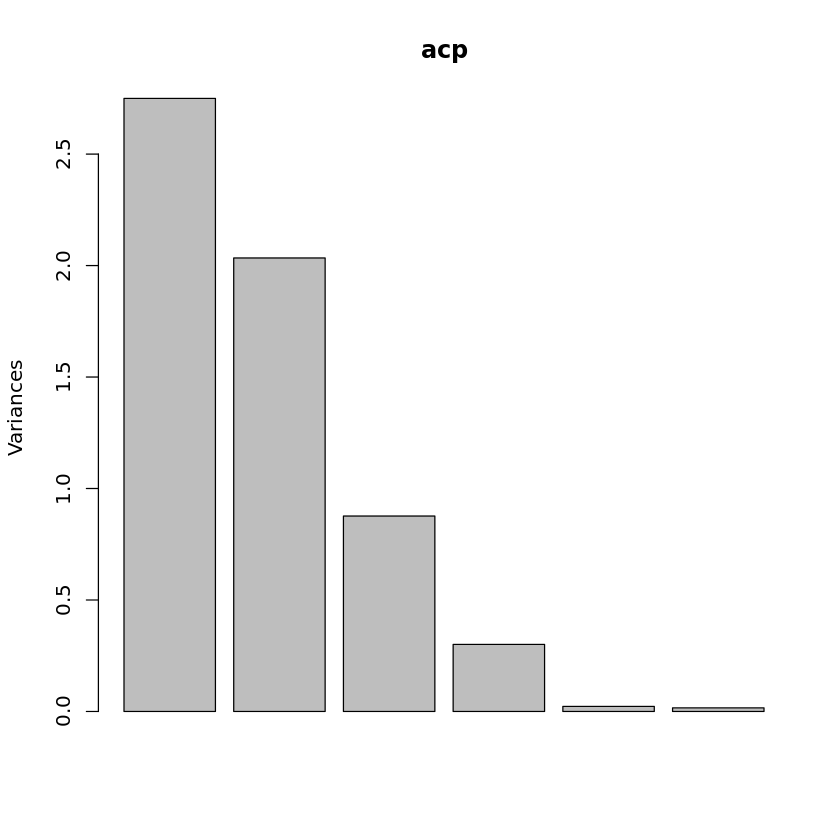

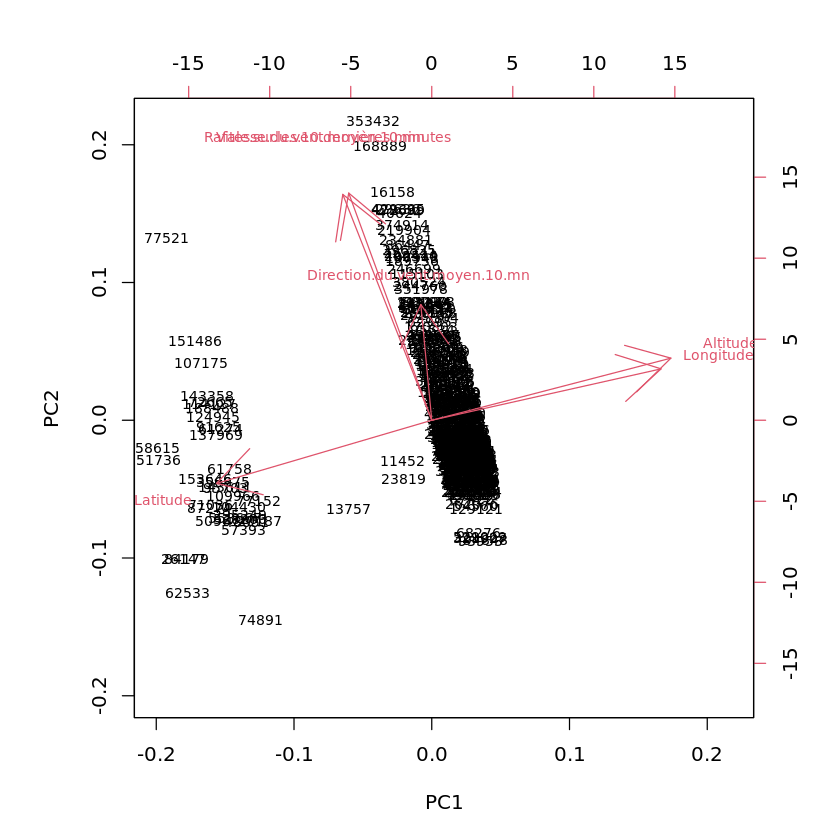

In [66]:
acp <- prcomp(cbind(data_10mn, data_geo), scale. = TRUE)
summary(acp)
plot(acp)
biplot(acp, cex = 0.7, arrow.len = 0.4)

